In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms

In [2]:
input_size = 784  # Number of input neurons (pixels in a 28 * 28 greyscale image)
hidden_size = 400  # Number of hidden neurons
out_size = 10  # Number of classes (0-9) 
epochs = 10  # How many times we pass our entire dataset into our network 
batch_size = 100  # Input size of the data during one iteration 
learning_rate = 0.001  # How fast we are learning

In [3]:
train_dataset = datasets.MNIST(root='./data',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./data',
                               train=False,
                               transform=transforms.ToTensor())

In [4]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

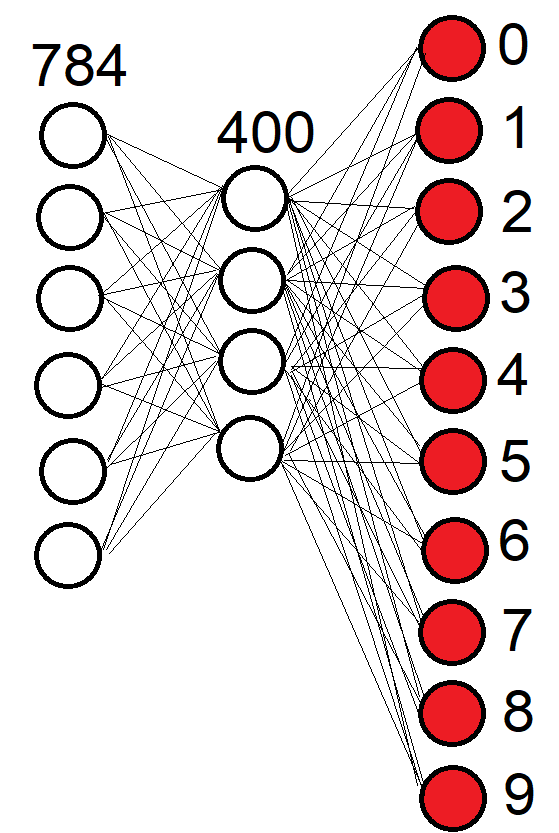

In [5]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, out_size):
        super(Net, self).__init__()

        self.fc1 = nn.Linear(input_size, hidden_size)  # Input Layer
        self.fc2 = nn.Linear(hidden_size, hidden_size)  # Hidden Layer
        self.fc3 = nn.Linear(hidden_size, out_size)  # Output Layer
        self.relu = nn.ReLU()  # ReLU Activation Function
        self.init_weights()

    def init_weights(self):
        nn.init.kaiming_normal_(self.fc1.weight)  # Initialize the weights for layers 1<->2 connections
        nn.init.kaiming_normal_(self.fc2.weight)  # Initialize the weights for layers 2<->3 connections

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out

In [6]:
# Create the object of the network
net = Net(input_size, hidden_size, out_size)
is_gpu = torch.cuda.is_available()
if is_gpu:
    net = net.cuda()

# The loss function - CrossEntropyLoss comes with Softmax
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

In [7]:
# Train the network
for epoch in range(epochs):
    correct_train = 0
    running_loss = 0
    for i, (images, labels) in enumerate(train_loader):
        images = images.view(-1, 28*28)  # Flatten each image in the batch from 28*28 to 784
        if is_gpu:
            images = images.cuda()
            labels = labels.cuda()

        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        correct_train += (predicted == labels).sum()
        loss = criterion(outputs, labels)
        running_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch + 1}/{epochs}], Training Loss: {round(running_loss / len(train_loader), 4)}, Training Accuracy: {round(float(correct_train.double() / len(train_loader)), 2)}%')
print('Training Complete')

Epoch [1/10], Training Loss: 0.2356, Training Accuracy: 93.13%
Epoch [2/10], Training Loss: 0.0865, Training Accuracy: 97.38%
Epoch [3/10], Training Loss: 0.0546, Training Accuracy: 98.3%
Epoch [4/10], Training Loss: 0.0391, Training Accuracy: 98.75%
Epoch [5/10], Training Loss: 0.0297, Training Accuracy: 99.03%
Epoch [6/10], Training Loss: 0.0231, Training Accuracy: 99.2%
Epoch [7/10], Training Loss: 0.0193, Training Accuracy: 99.36%
Epoch [8/10], Training Loss: 0.0163, Training Accuracy: 99.44%
Epoch [9/10], Training Loss: 0.0153, Training Accuracy: 99.48%
Epoch [10/10], Training Loss: 0.0129, Training Accuracy: 99.57%
Training Complete


In [8]:
with torch.no_grad():
    correct = 0
    for i, (images, labels) in enumerate(test_loader):
        if is_gpu:
            images = images.cuda()
            labels = labels.cuda()
        images = images.view(-1, 28*28)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()

    print('Accuracy on {} testing images: {}%'.format(len(test_dataset), 100 * correct / len(test_dataset)))

Accuracy on 10000 testing images: 97.95%
